# Twitter Sentiment Analysis: Self-driving cars

DATA 512 - Human Centered Data Science <br>
Fall 2019

## Motivation

A Self-driving car or an autonomous car is a vehicle that is capable of sensing it's environment and navigating safely in a given space with little or no human input [1]. Although self-driving as an early concept dates back to the 1920s,
the first self-sufficient and truly autonomous cars appeared in the 1980s. Carnegie Mellon University's Navlab and ALV projects in 1984, and Mercedes-Benz and Bundeswehr University Munich's Eureka Prometheus Project in 1987 marked the beginning of a new era. But it wasn't until a decade ago that self-driving cars moved from the hands of government funded projects and challenges to private car manufacturers such as General Motors, Ford, BMW, Volkswagen, Mercedes Benz, Audi, Nissan, Toyota, and Volvo. By 2015, self-driving cars had become the topic of debate in households. 

Today, several breakthroughs and advancements later, we hear about how self-driving cars are going to be a part and parcel of the very near future. Many companies, large and small, are racing to claim the crown of having solved level 5 autonomy. Autonomous driving start-ups are rampant in the Sillicon Valley and around the US at large. It's never been a better time for the field, yet the human aspect of self-driving cars is largely under studied. 

This project is an attempt to understand and analyse the general vibe around self-driving as expressed on Twitter from May 15, 2015 to May 31, 2015. This was around the time when news was flying about Google's self-driving test initiative - [Google to begin testing purpose-built self-driving cars on public roads](https://www.theguardian.com/technology/2015/may/15/google-testing-purpose-built-self-driving-cars-public-roads). Also around the same time were articles about accidents being caused by self-driving cars - [Self-driving car accidents revealed in California](https://www.bbc.com/news/technology-32691887).


## Reporoducibility

All the quantitative analyses shown in this notebook are easily reproducible with the right python packages and data provided in this repository. However, the qualitative analyses are a result of my personal research and inuition (and possible biases thereby). I have attached the relevant sources that support my claims and hypothesis to the best of my ability to help others audit and review my work and form independent conclusions. 

## Research Directions
- What is the general sentiment of people around self-driving cars?
- What promoted these opinions?
- What are people talking about? Did the happenings around the world sway people in one direction or another?
- Study of the type of words used to express positive and negative sentiment.


### Thick Data Approach

Here are some snippets collected from several top news agencies around the same time that is represented in this dataset. 
The dates of release of these articles is note worthy - 
- May 11, 2015, [BBC News](https://www.bbc.com/news/technology-32691887): "Four out of the 48 self-driving cars on public roads in California have been involved in accidents in the last eight months, according to the state's Department of Motor Vehicles."
- May 12, 2015, [The Economist](https://www.economist.com/the-economist-explains/2015/05/12/how-does-a-self-driving-car-work): "Cars that can drive themselves, a staple of science-fiction, have started to appear on roads in real life."
- May 15, 2015, [The Guardian](https://www.theguardian.com/technology/2015/may/15/google-testing-purpose-built-self-driving-cars-public-roads): "Google’s prototype self-driving car pods will take to public roads for the first time around its headquarters in Mountain View, California this summer."

Following are some cherry picked examples of tweets from the dataset. Several of them seem to be reactions to happenings around the world. Highlighted in bold are the ones that seem to closely resemble news from the above 3 articles. 

- **"There is an acceptable level of risk with all new technology, but the reality that people will die in autonomous car is hard to accept."** 😢
- "If Google maps can't keep up with road construction, how am I supposed to trust a driverless car to get around here?" 😟
- "Audi gets first permit to test self-driving cars in California: Think twice next time you tailgate that new Audi…"  😐
- "Google unveils driver-less car...can you see yourself buying an autonomous car?" 😐
- **"Just saw Google self-driving car on I-34. It was painted green and blue."** 😐
- "Google should buy Tesla and Uber, mix a little autonomous car into the mix and solve all transportation problems.  #sentFromTraffic" 😀
- **"Awesome! Google driverless cars will help the blind travel more often."** 😁
- "Autonomous vehicles could reduce traffic fatalities by 90%...I'm in!" 😁

                Legend: 😢: 1  😟: 2  😐: 3  😀: 4  😁: 5


On digging a little more into articles on Waymo, Google's self-driving car division, during this time period, I found the following on [Wikipedia](https://en.wikipedia.org/wiki/Waymo) -
"In 2015, Google provided "the world's first fully driverless ride on public roads" to a legally blind friend of principal engineer Nathaniel Fairfield. The ride was taken by Steve Mahan, former CEO of the Santa Clara Valley Blind Center, in Austin, Texas. It was the first driverless ride that was on a public road and was not accompanied by a test driver or police escort. The car had no steering wheel or floor pedals."

The tweet - _"Awesome! Google driverless cars will help the blind travel more often."_ seems to be directly correlated with the above incident. 

### Quantitative Approach

#### Getting started

Let's begin by first importing all the necessary python libraries ...

In [1]:
# Helper modules
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from nltk.stem.lancaster import LancasterStemmer
import re
import string
import codecs
# Plotting modules
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

import inflect
p = inflect.engine()

In [2]:
# Loading raw twitter sentiment file
data_path = './Data/RawData/Twitter-sentiment-self-drive-DFE.csv'
data = pd.read_csv(data_path, encoding = "ISO-8859-1")

# Opening with codes since some special characters and emojis might be present in the data
with codecs.open(data_path, 'r', encoding='utf-8', errors='ignore') as fdata:
    data = pd.read_csv(fdata)
    

In [3]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,our_id,sentiment_gold,sentiment_gold_reason,text
0,724227031,True,golden,236,NaN,5,0.7579,10001,5\n4,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,724227032,True,golden,231,NaN,5,0.8775,10002,5\n4,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,724227033,True,golden,233,NaN,2,0.6805,10003,2\n1,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,724227034,True,golden,240,NaN,2,0.8820,10004,2\n1,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,724227035,True,golden,240,NaN,3,1.0000,10005,3,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...


We will only use 2 columns for this analysis - _sentiment_ and _text_

In [4]:
# Extracting relevant columns from the raw data
data = data[['sentiment', 'text']]

In [5]:
data['sentiment'].unique()
# Sentiment contains non-integer values

array(['5', '2', '3', 'not_relevant', '1', '4'], dtype=object)

In [6]:
# Removing rows which have sentiment value as 'not_relevant'
data = data[data['sentiment']!='not_relevant']
data['sentiment'] = data['sentiment'].astype('int')

In [7]:
data = data.reset_index();


In [8]:
data = data.drop(['index'], axis=1)
data

,sentiment,text
0,5,Two places I'd invest all my money if I could:...
1,5,Awesome! Google driverless cars will help the ...
2,2,If Google maps can't keep up with road constru...
3,2,Autonomous cars seem way overhyped given the t...
4,3,Just saw Google self-driving car on I-34. It w...
5,3,Will driverless cars eventually replace taxi d...
6,5,Autonomous vehicles could reduce traffic fatal...
7,1,Driverless cars are not worth the risk. Don't...
8,3,"Driverless cars are now legal in Florida, Cali..."
9,3,Audi is the first carmaker to get a license fr...


Let's create a new column that contains one of -1, 0 or +1 based on the value in _'sentiment'_: <br>
- -1 indicating negative polarity of sentiment (i.e. sentiment value of 1 or 2) <br>
- +1 indicating positive polarity of sentiment (i.e. sentiment value of 4 or 5) or <br> 
- 0 indicating neutral polarity of sentiment (i.e. sentiment value of 3)

In [9]:
def assign_polarity(row):
    if row['sentiment'] < 3: 
        return -1 
    elif row['sentiment'] > 3:
        return 1
    else:
        return 0

In [10]:
# Assign positive, negative, neutral polarity to each tweet
data['polarity'] = data.apply(lambda row: assign_polarity(row), axis=1)

In [11]:
data.head()

,sentiment,text,polarity
0,5,Two places I'd invest all my money if I could:...,1
1,5,Awesome! Google driverless cars will help the ...,1
2,2,If Google maps can't keep up with road constru...,-1
3,2,Autonomous cars seem way overhyped given the t...,-1
4,3,Just saw Google self-driving car on I-34. It w...,0


In [12]:
# Saving cleaned data to file
data.to_csv('./Data/cleaned_data.csv', index=False)

The preprocessing code is derived from code made available by Anil Emrah in this [post](https://medium.com/analytics-vidhya/basic-tweet-preprocessing-method-with-python-56b4e53854a1).

In [13]:
def preprocess_tweet(text):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc) 
    # convert text to lower-case
    nopunc = nopunc.lower()
    # remove URLs
    nopunc = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', nopunc)
    nopunc = re.sub(r'http\S+', '', nopunc)
    # remove usernames
    nopunc = re.sub('@[^\s]+', '', nopunc)
    nopunc = re.sub('̢[^\s]+', '', nopunc)
    # remove the # in #hashtag
    nopunc = re.sub(r'#([^\s]+)', r'\1', nopunc)
    # remove repeated characters
    nopunc = word_tokenize(nopunc)

    # remove stopwords from final word list
    #nopunc = ' '.join(word for word in nopunc if word not in stopwords.words('english'))
    output = ''
    for word in nopunc:
        if word not in stopwords.words('english'):
            if p.singular_noun(word):
                output += ' ' + p.singular_noun(word)
            else:
                output += ' ' + word
    return output

In [14]:
data['text'] = data['text'].apply(preprocess_tweet)


In [15]:
data.head()

,sentiment,text,polarity
0,5,two place id invest money could 3d printing s...,1
1,5,awesome google driverles car help blind trave...,1
2,2,google map cant keep road construction suppos...,-1
3,2,autonomou car seem way overhyped given techno...,-1
4,3,saw google selfdriving car i34 painted green ...,0


### Plot of distribution of sentiment on a scale of 1-5 

Text(0.5,1,'Distribution of sentiment')

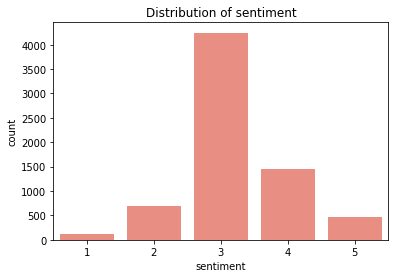

In [16]:
ax = sns.countplot(x='sentiment', data=data, color='salmon')
ax.set_title('Distribution of sentiment')

### Plot of distribution of polarity(+1, 0, -1)

Text(0.5,1,'Distribution of polarity')

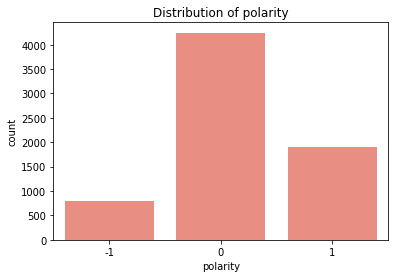

In [17]:
ax = sns.countplot(x='polarity', data=data, color='salmon')
ax.set_title('Distribution of polarity')

From the above plots, we see that the sentiment is positively skewed. 

### WORD CLOUDS


In [18]:
df_positive = data[data['polarity']==1]
df_negative = data[data['polarity']==-1]
df_neutral = data[data['polarity']==0]

(-0.5, 999.5, 499.5, -0.5)

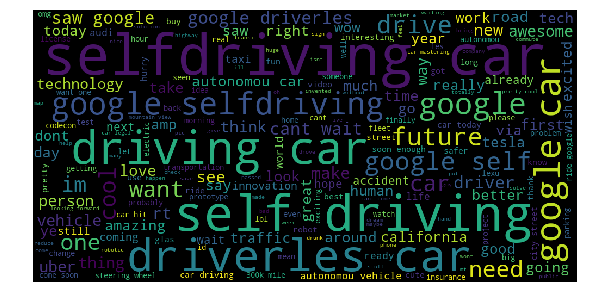

In [19]:
stop_words = set(STOPWORDS)
pos = (' '.join(df_positive['text']))

wordcloud = WordCloud(width = 1000, height = 500, stopwords=stop_words).generate(pos)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

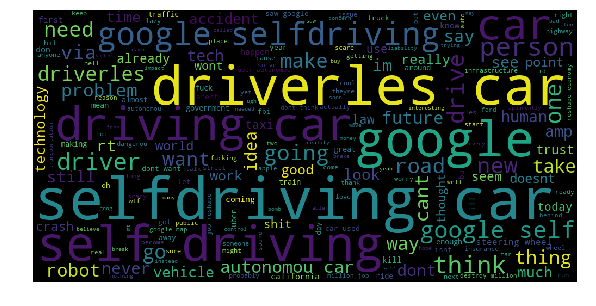

In [20]:
stop_words = set(STOPWORDS)
neg = (' '.join(df_negative['text']))

wordcloud = WordCloud(width = 1000, height = 500, stopwords=stop_words).generate(neg)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

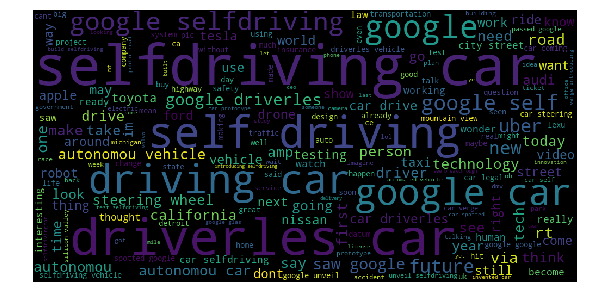

In [21]:
stop_words = set(STOPWORDS)
neut = (' '.join(df_neutral['text']))

wordcloud = WordCloud(width = 1000, height = 500, stopwords=stop_words).generate(neut)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [22]:
from collections import Counter 

def plot_top_k_words(k, df, title):

    #Get words
    tokens = []
    for index, rows in df.iterrows(): 
        # Create list for the current row 
        tokens.extend(rows.text.split()) 

    counter = Counter(tokens) 
    #top-k frequency words
    most_occurring = counter.most_common(k) 

    print(most_occurring)

    plt.figure(figsize=(14,7))
    top_k = pd.DataFrame(most_occurring, columns=['word','frequency'])
    ax = sns.barplot(x="word", y='frequency', data=top_k)
    ax.set_title(title)
    loc, labels = plt.xticks()
    ax.set_xticklabels(labels, rotation=30);

### Top 20 word-frequencies

[('car', 6783), ('google', 3080), ('selfdriving', 2541), ('driverles', 1938), ('driving', 1708), ('self', 1455), ('autonomou', 380), ('vehicle', 358), ('future', 324), ('get', 294), ('saw', 291), ('drive', 289), ('one', 280), ('like', 265), ('road', 259), ('uber', 259), ('driver', 248), ('need', 234), ('new', 233), ('would', 231)]


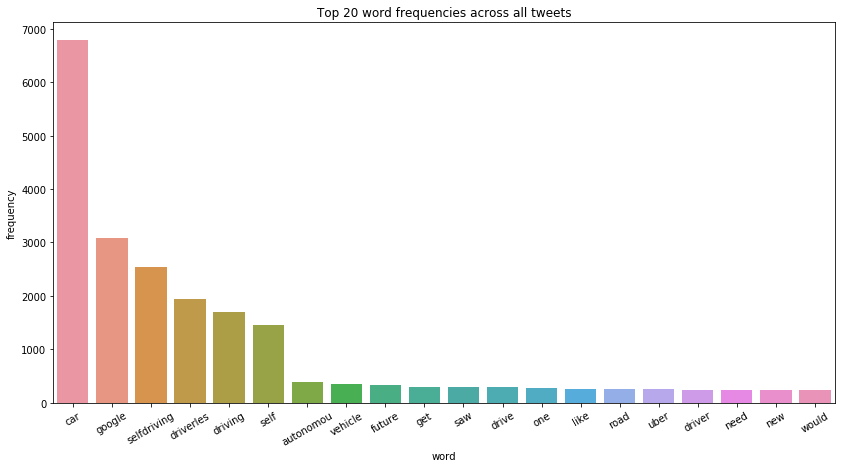

In [23]:
k = 20
plot_top_k_words(k, data, 'Top 20 word frequencies across all tweets')

[('car', 1866), ('google', 830), ('selfdriving', 715), ('driving', 575), ('self', 479), ('driverles', 457), ('drive', 119), ('want', 114), ('one', 112), ('future', 111), ('cool', 107), ('need', 100), ('saw', 99), ('cant', 99), ('would', 98), ('wait', 97), ('get', 94), ('im', 87), ('could', 84), ('driver', 79)]


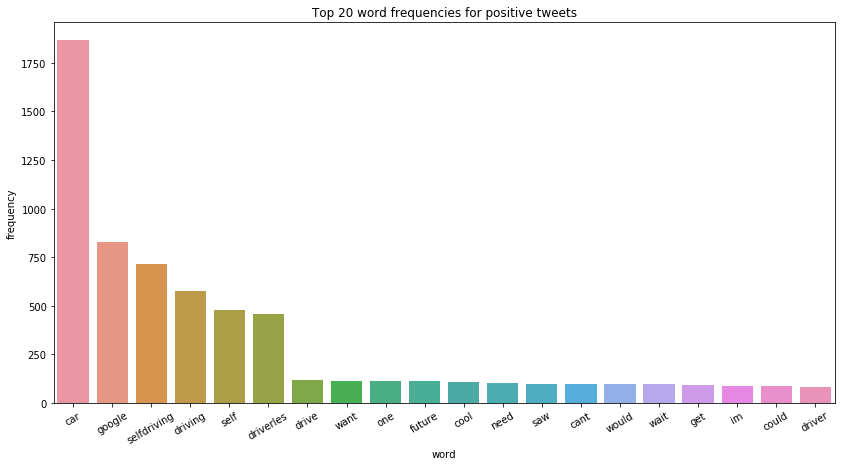

In [24]:
plot_top_k_words(k, df_positive, 'Top 20 word frequencies for positive tweets')

[('car', 828), ('google', 296), ('selfdriving', 285), ('driverles', 254), ('driving', 228), ('self', 189), ('like', 50), ('get', 46), ('think', 46), ('driver', 46), ('person', 44), ('dont', 43), ('one', 40), ('autonomou', 37), ('want', 37), ('drive', 35), ('would', 34), ('go', 34), ('going', 33), ('road', 31)]


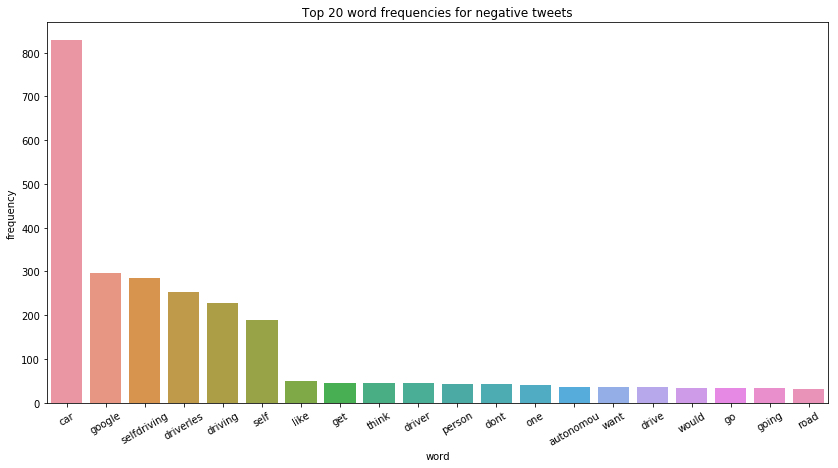

In [25]:
plot_top_k_words(k, df_negative, 'Top 20 word frequencies for negative tweets')

[('car', 4089), ('google', 1954), ('selfdriving', 1541), ('driverles', 1227), ('driving', 905), ('self', 787), ('autonomou', 265), ('vehicle', 263), ('future', 191), ('uber', 190), ('saw', 177), ('road', 171), ('get', 154), ('new', 151), ('california', 148), ('like', 143), ('via', 141), ('drive', 135), ('rt', 129), ('one', 128)]


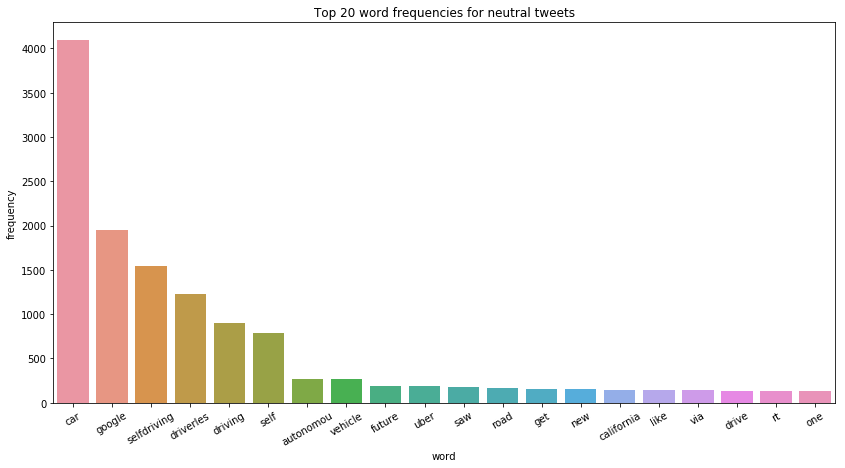

In [26]:
plot_top_k_words(k, df_neutral, 'Top 20 word frequencies for neutral tweets')

**Google** features as the most frequent word, ignoring 'car'(which is a generic and uninteresting). <br>
Another interesting aspect is words like 'want' and 'future' emerge as top used words for positive tweets indicating that these might be people who would like to own a selfdriving car and see it as a part of the future. <br>
Interestingly, Uber appears within top 10 words among neutral tweets. 

### Conclusion

- A drawback of qualitative analysis is that we can only speculate. We cannot establish statistical statistical significance or arrive at causal conclusions. 
- However, it is a helpful tool in gathering evidence about a hypothesis to convince oneself, 
especially around complex nuances of the world which are hard to model.
- Addressing the questions we set out to answer - 
    - What is the general sentiment of people around self-driving cars? **Positive skewed**
    - What promoted these opinions? **Google's self-driving test launch and accidents in California (self-certified speculation)**
    - What are people talking about? **Google**

## References


[1] [Governing autonomous vehicles: emerging responses for safety, liability, privacy, cybersecurity, and industry risks](https://www.tandfonline.com/doi/full/10.1080/01441647.2018.1494640) <br>
[2] [Google to begin testing purpose-built self-driving cars on public roads](https://www.theguardian.com/technology/2015/may/15/google-testing-purpose-built-self-driving-cars-public-roads) <br>
[3] [Self-driving car accidents revealed in California](https://www.bbc.com/news/technology-32691887) <br>
[4] [How does a self-driving car work?](https://www.economist.com/the-economist-explains/2015/05/12/how-does-a-self-driving-car-work)